In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/JPY_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222740, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,108.730,108.751,108.715,108.751
2020-01-01 17:05:00,108.759,108.738,108.736,108.759
2020-01-01 17:10:00,108.738,108.728,108.590,108.750
2020-01-01 17:15:00,108.728,108.677,108.575,108.735
2020-01-01 17:20:00,108.679,108.686,108.679,108.694


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


(222739, 12)


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,108.730,108.751,108.715,108.751,108.738,17,2,1,-0.021,108.7330,0.036,108.73675
2020-01-01 17:05:00,108.759,108.738,108.736,108.759,108.728,17,2,1,0.021,108.7475,0.023,108.74800
2020-01-01 17:10:00,108.738,108.728,108.590,108.750,108.677,17,2,1,0.010,108.6700,0.160,108.70150
2020-01-01 17:15:00,108.728,108.677,108.575,108.735,108.686,17,2,1,0.051,108.6550,0.160,108.67875
2020-01-01 17:20:00,108.679,108.686,108.679,108.694,108.703,17,2,1,-0.007,108.6865,0.015,108.68450


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,108.730,108.751,108.715,108.751,108.738,17,2,1,-0.021,108.7330,0.036,108.73675,-22.264275
2020-01-01 17:05:00,108.759,108.738,108.736,108.759,108.728,17,2,1,0.021,108.7475,0.023,108.74800,-22.239555
2020-01-01 17:10:00,108.738,108.728,108.590,108.750,108.677,17,2,1,0.010,108.6700,0.160,108.70150,-22.374552
2020-01-01 17:15:00,108.728,108.677,108.575,108.735,108.686,17,2,1,0.051,108.6550,0.160,108.67875,-22.419420
2020-01-01 17:20:00,108.679,108.686,108.679,108.694,108.703,17,2,1,-0.007,108.6865,0.015,108.68450,-22.390566


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  108.730  108.715  108.751         108.738    17    2   
2020-01-01 17:05:00  108.759  108.736  108.759         108.728    17    2   
2020-01-01 17:10:00  108.738  108.590  108.750         108.677    17    2   
2020-01-01 17:15:00  108.728  108.575  108.735         108.686    17    2   
2020-01-01 17:20:00  108.679  108.679  108.694         108.703    17    2   

                     week  momentum  avg_price  range  ohlc_price        pca  
timestamp                                                                     
2020-01-01 17:00:00     1    -0.021   108.7330  0.036   108.73675 -22.264275  
2020-01-01 17:05:00     1     0.021   108.7475  0.023   108.74800 -22.239555  
2020-01-01 17:10:00     1     0.010   108.6700  0.160   108.70150 -22.374552  
2020-01-01 17:15:00     1     0.051   108.6550  0.160   108.67875

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_15Min(X,y)

178191
178191
7500
7500
37048
37048


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(178191, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(178166, 24, 12)
(7475, 24, 12)
(37023, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(178166, 1)
(7475, 1)
(37023, 1)


array([[0.24513888],
       [0.24537253],
       [0.24533916],
       ...,
       [0.8828335 ],
       [0.8822999 ],
       [0.8840008 ]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.24513888, 0.24537253, 0.24533916, ..., 0.8828335 , 0.8822999 ,
       0.8840008 ], dtype=float32)

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 24, 256)           275456    
                                                                 
 lstm_4 (LSTM)               (None, 24, 64)            82176     
                                                                 
 dropout_1 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 16)                5184      
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD5_LSTM", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 1064.2526 - mae: 13.1483 - mse: 1064.2526 - root_mean_squared_error: 32.6229 - mape: 18252.4414
Epoch 1: val_mse improved from inf to 0.51095, saving model to /content/drive/MyDrive/modelweights/JPY_USD5_LSTM


463/463 [==============================] - 29s 42ms/step - loss: 1064.2526 - mae: 13.1483 - mse: 1064.2526 - root_mean_squared_error: 32.6229 - mape: 18252.4414 - val_loss: 0.5110 - val_mae: 0.6412 - val_mse: 0.5110 - val_root_mean_squared_error: 0.7148 - val_mape: 158961.7500
Epoch 2/60
462/463 [============================>.] - ETA: 0s - loss: 0.3352 - mae: 0.5317 - mse: 0.3352 - root_mean_squared_error: 0.5789 - mape: 5139.9243
Epoch 2: val_mse improved from 0.51095 to 0.10106, saving model to /content/drive/MyDrive/modelweights/JPY_USD5_LSTM


463/463 [==============================] - 18s 39ms/step - loss: 0.3348 - mae: 0.5313 - mse: 0.3348 - root_mean_squared_error: 0.5786 - mape: 5131.6787 - val_loss: 0.1011 - val_mae: 0.2836 - val_mse: 0.1011 - val_root_mean_squared_error: 0.3179 - val_mape: 77682.3125
Epoch 3/60
462/463 [============================>.] - ETA: 0s - loss: 0.0803 - mae: 0.2536 - mse: 0.0803 - root_mean_squared_error: 0.2834 - mape: 2956.0984
Epoch 3: val_mse did not improve from 0.10106
463/463 [==============================] - 7s 15ms/step - loss: 0.0803 - mae: 0.2535 - mse: 0.0803 - root_mean_squared_error: 0.2833 - mape: 2951.3618 - val_loss: 0.1147 - val_mae: 0.3119 - val_mse: 0.1147 - val_root_mean_squared_error: 0.3387 - val_mape: 56497.6758
Epoch 4/60
462/463 [============================>.] - ETA: 0s - loss: 0.0466 - mae: 0.1798 - mse: 0.0466 - root_mean_squared_error: 0.2158 - mape: 2217.8650
Epoch 4: val_mse did not improve from 0.10106
463/463 [==============================] - 7s 15ms/step - l

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

In [ ]:
early_stopping = EarlyStopping(monitor='val_mse', patience=12)

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD5_LSTM")

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=20
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
462/463 [============================>.] - ETA: 0s - loss: 0.0134 - mae: 0.0615 - mse: 0.0134 - root_mean_squared_error: 0.1156 - mape: 773.7531
Epoch 1: val_mse improved from 0.10106 to 0.00174, saving model to /content/drive/MyDrive/modelweights/JPY_USD5_LSTM


463/463 [==============================] - 23s 41ms/step - loss: 0.0133 - mae: 0.0615 - mse: 0.0133 - root_mean_squared_error: 0.1155 - mape: 772.4759 - val_loss: 0.0017 - val_mae: 0.0363 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0417 - val_mape: 13671.9990 - lr: 0.0010
Epoch 2/20
461/463 [============================>.] - ETA: 0s - loss: 1.7590e-04 - mae: 0.0095 - mse: 1.7590e-04 - root_mean_squared_error: 0.0133 - mape: 509.8499
Epoch 2: val_mse did not improve from 0.00174
463/463 [==============================] - 7s 15ms/step - loss: 1.7567e-04 - mae: 0.0095 - mse: 1.7567e-04 - root_mean_squared_error: 0.0133 - mape: 507.9140 - val_loss: 0.0019 - val_mae: 0.0371 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0437 - val_mape: 12103.4727 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
463/463 [==============================] - ETA: 0s - loss: 9.6662e-05 - mae: 0.0071 - mse: 9.6662e-05 - root_mean_squared_error: 0.0098 - mape: 409.5443
Epoch 3: val_mse did no

463/463 [==============================] - 18s 39ms/step - loss: 7.1955e-05 - mae: 0.0062 - mse: 7.1955e-05 - root_mean_squared_error: 0.0085 - mape: 399.7247 - val_loss: 0.0014 - val_mae: 0.0301 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0371 - val_mape: 11773.2686 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
462/463 [============================>.] - ETA: 0s - loss: 5.8503e-05 - mae: 0.0056 - mse: 5.8503e-05 - root_mean_squared_error: 0.0076 - mape: 388.0900
Epoch 5: val_mse did not improve from 0.00138
463/463 [==============================] - 7s 16ms/step - loss: 5.8496e-05 - mae: 0.0056 - mse: 5.8496e-05 - root_mean_squared_error: 0.0076 - mape: 387.4503 - val_loss: 0.0020 - val_mae: 0.0382 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0452 - val_mape: 12299.9561 - lr: 8.1000e-04
Epoch 6/20
463/463 [==============================] - ETA: 0s - loss: 5.6707e-05 - mae: 0.0054 - mse: 5.6707e-05 - root_mean_squared_error: 0.0075 - mape: 358.6466
Epoch 6

463/463 [==============================] - 19s 42ms/step - loss: 4.4744e-05 - mae: 0.0048 - mse: 4.4744e-05 - root_mean_squared_error: 0.0067 - mape: 355.0454 - val_loss: 0.0013 - val_mae: 0.0292 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0358 - val_mape: 10241.4287 - lr: 7.2900e-04
Epoch 8/20
463/463 [==============================] - ETA: 0s - loss: 4.4295e-05 - mae: 0.0048 - mse: 4.4295e-05 - root_mean_squared_error: 0.0067 - mape: 346.4302
Epoch 8: val_mse did not improve from 0.00128
463/463 [==============================] - 7s 16ms/step - loss: 4.4295e-05 - mae: 0.0048 - mse: 4.4295e-05 - root_mean_squared_error: 0.0067 - mape: 346.4302 - val_loss: 0.0554 - val_mae: 0.0442 - val_mse: 0.0554 - val_root_mean_squared_error: 0.2354 - val_mape: 9890.3496 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/20
461/463 [============================>.] - ETA: 0s - loss: 4.4033e-05 - mae: 0.0048 - mse: 4.4033e-05 - root_mean_squared_error: 0.0066 - mape: 333.4924
Epoch 9:

463/463 [==============================] - 18s 39ms/step - loss: 3.0889e-05 - mae: 0.0040 - mse: 3.0889e-05 - root_mean_squared_error: 0.0056 - mape: 301.1488 - val_loss: 0.0011 - val_mae: 0.0270 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0329 - val_mape: 7284.7954 - lr: 5.3144e-04
Epoch 14/20
460/463 [============================>.] - ETA: 0s - loss: 3.1203e-05 - mae: 0.0040 - mse: 3.1203e-05 - root_mean_squared_error: 0.0056 - mape: 298.9964
Epoch 14: val_mse did not improve from 0.00108
463/463 [==============================] - 7s 15ms/step - loss: 3.1162e-05 - mae: 0.0040 - mse: 3.1162e-05 - root_mean_squared_error: 0.0056 - mape: 297.2175 - val_loss: 0.0015 - val_mae: 0.0338 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0390 - val_mape: 7687.6982 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/20
462/463 [============================>.] - ETA: 0s - loss: 2.6492e-05 - mae: 0.0037 - mse: 2.6492e-05 - root_mean_squared_error: 0.0051 - mape: 293.7459
Epoch

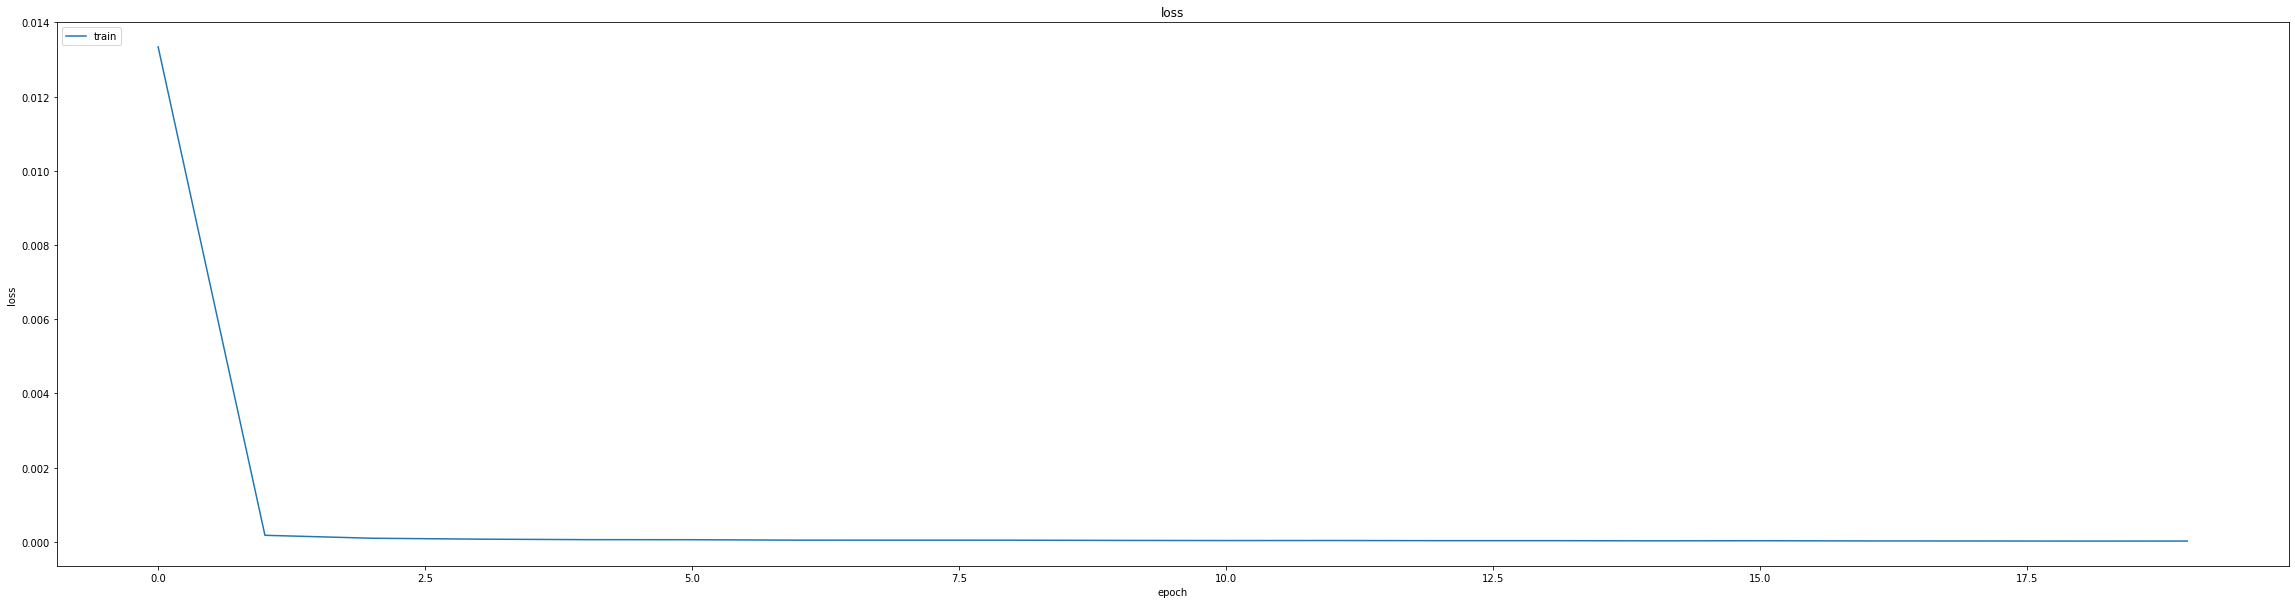

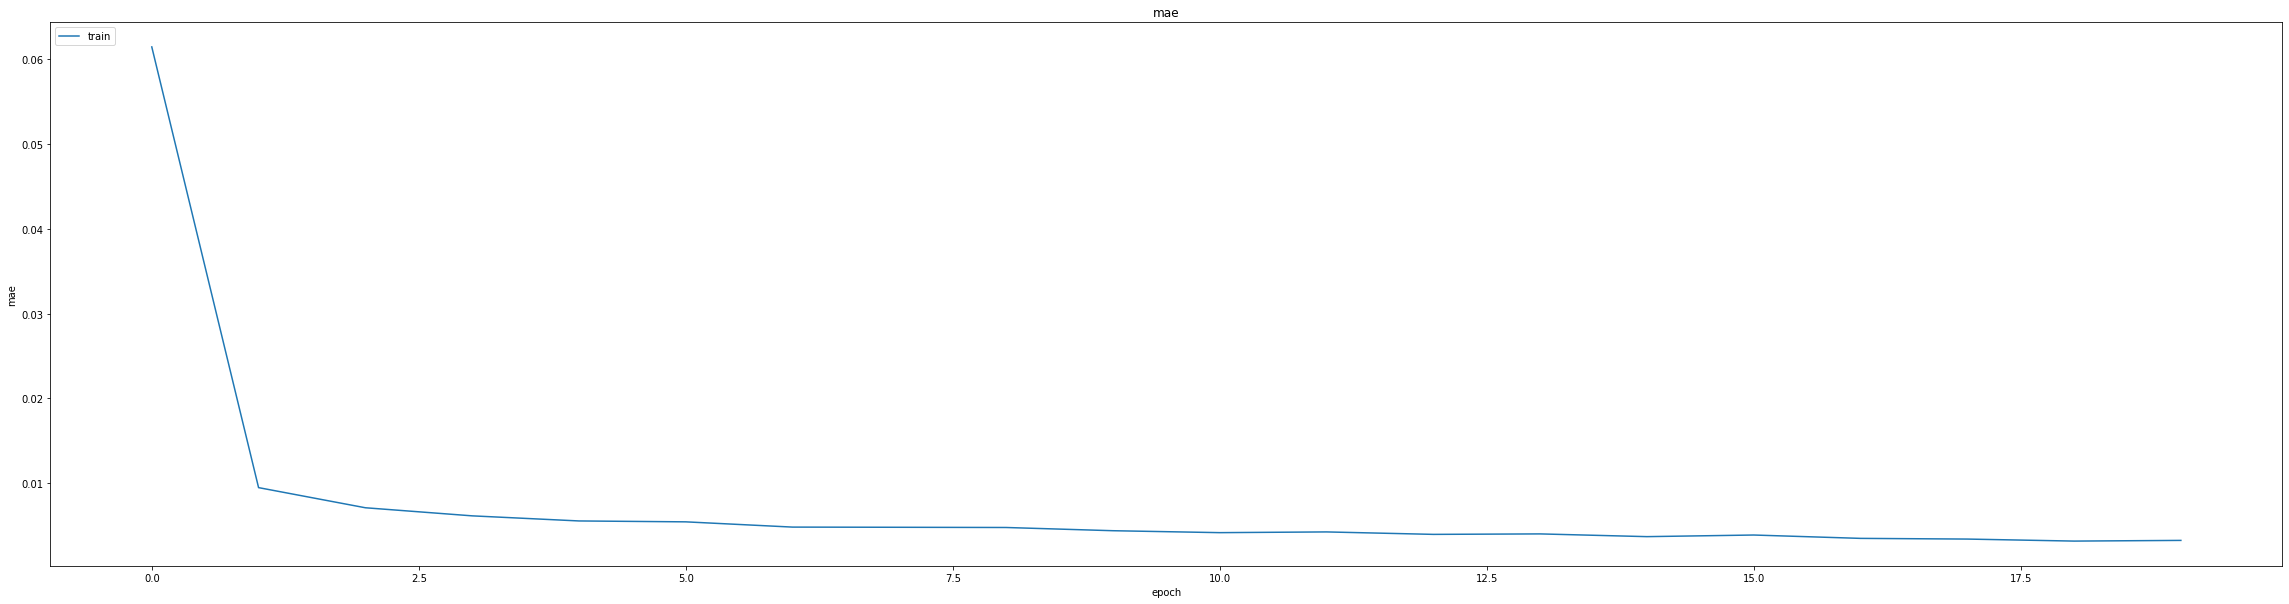

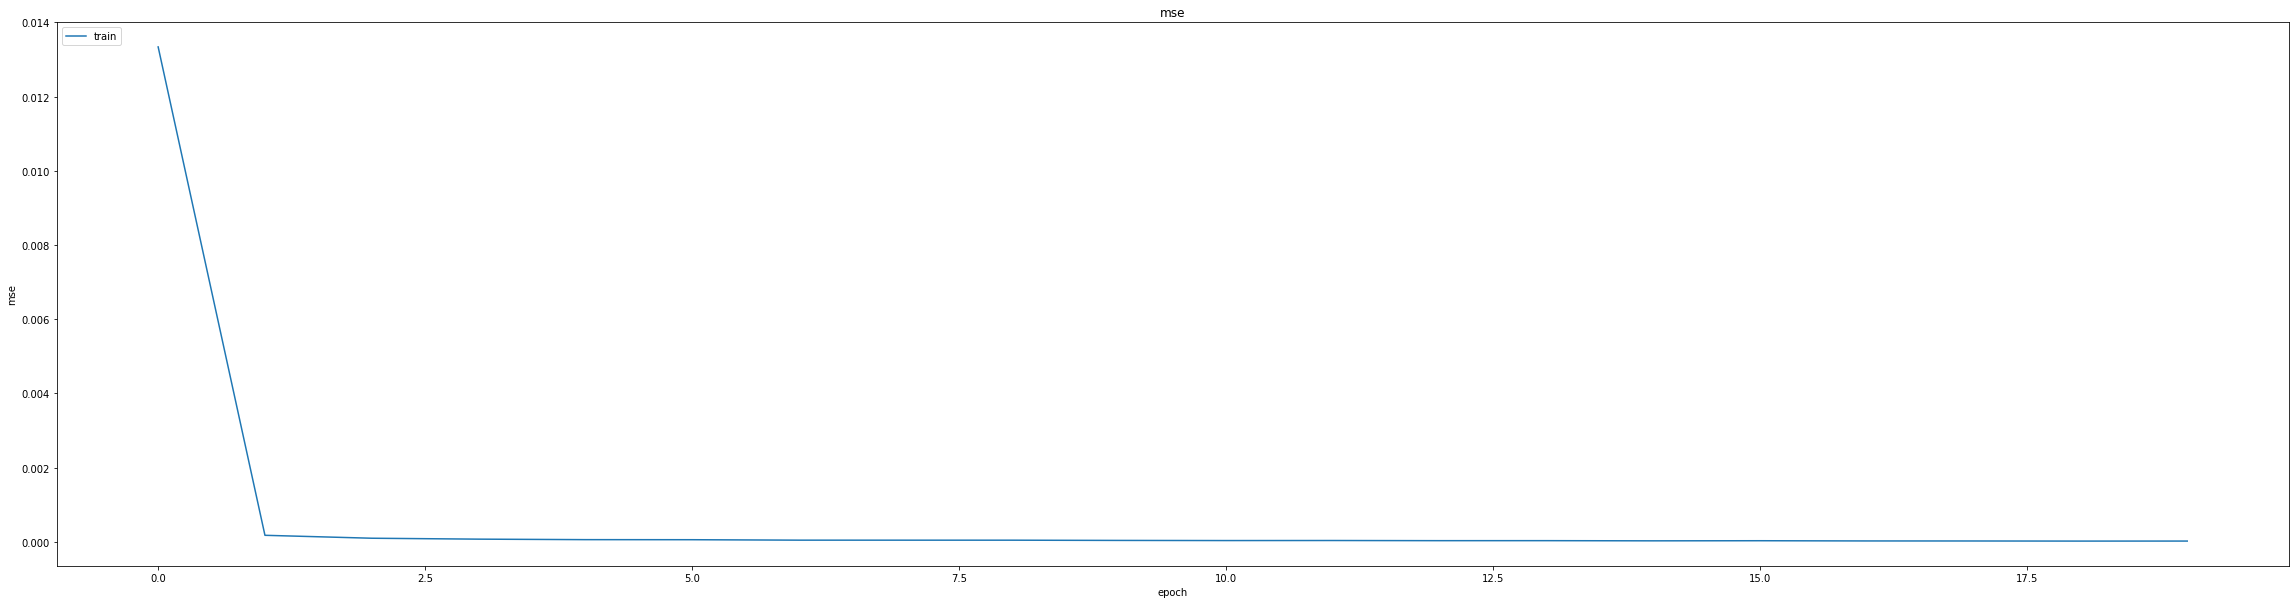

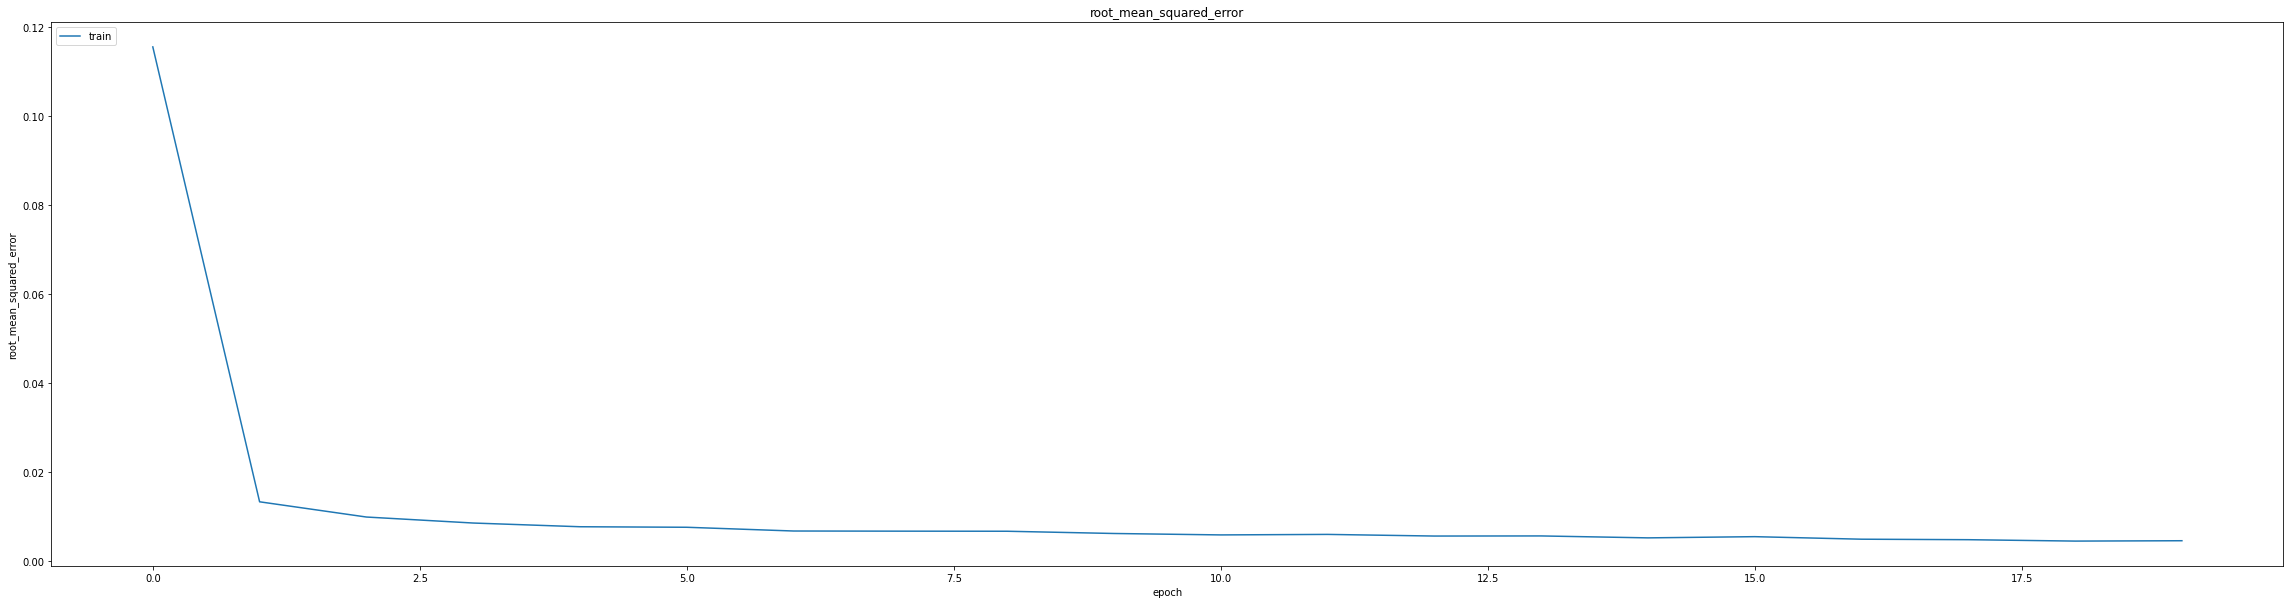

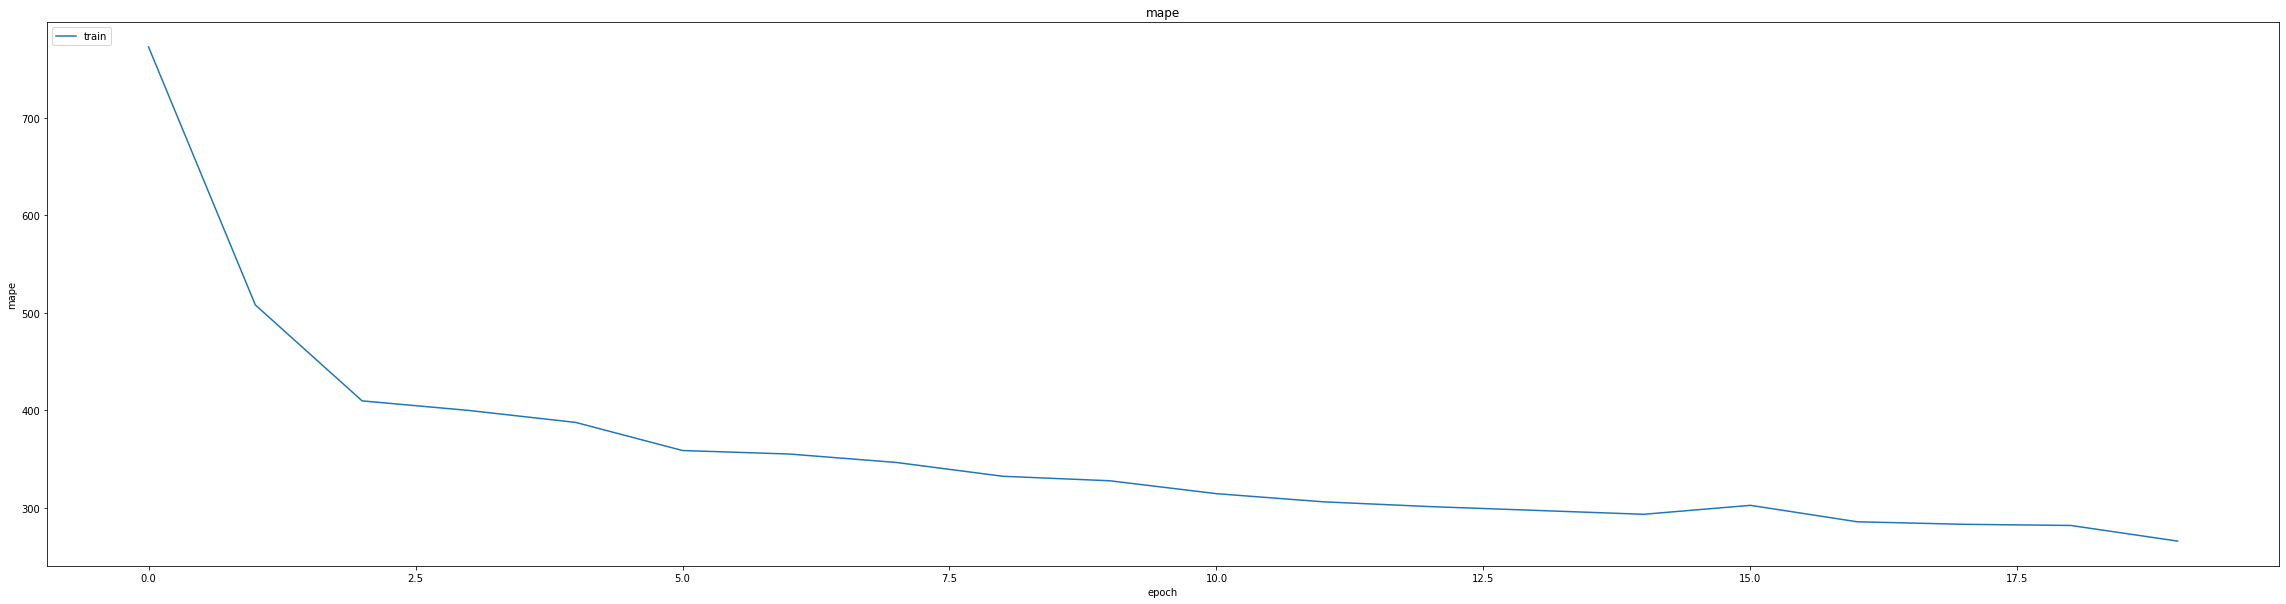

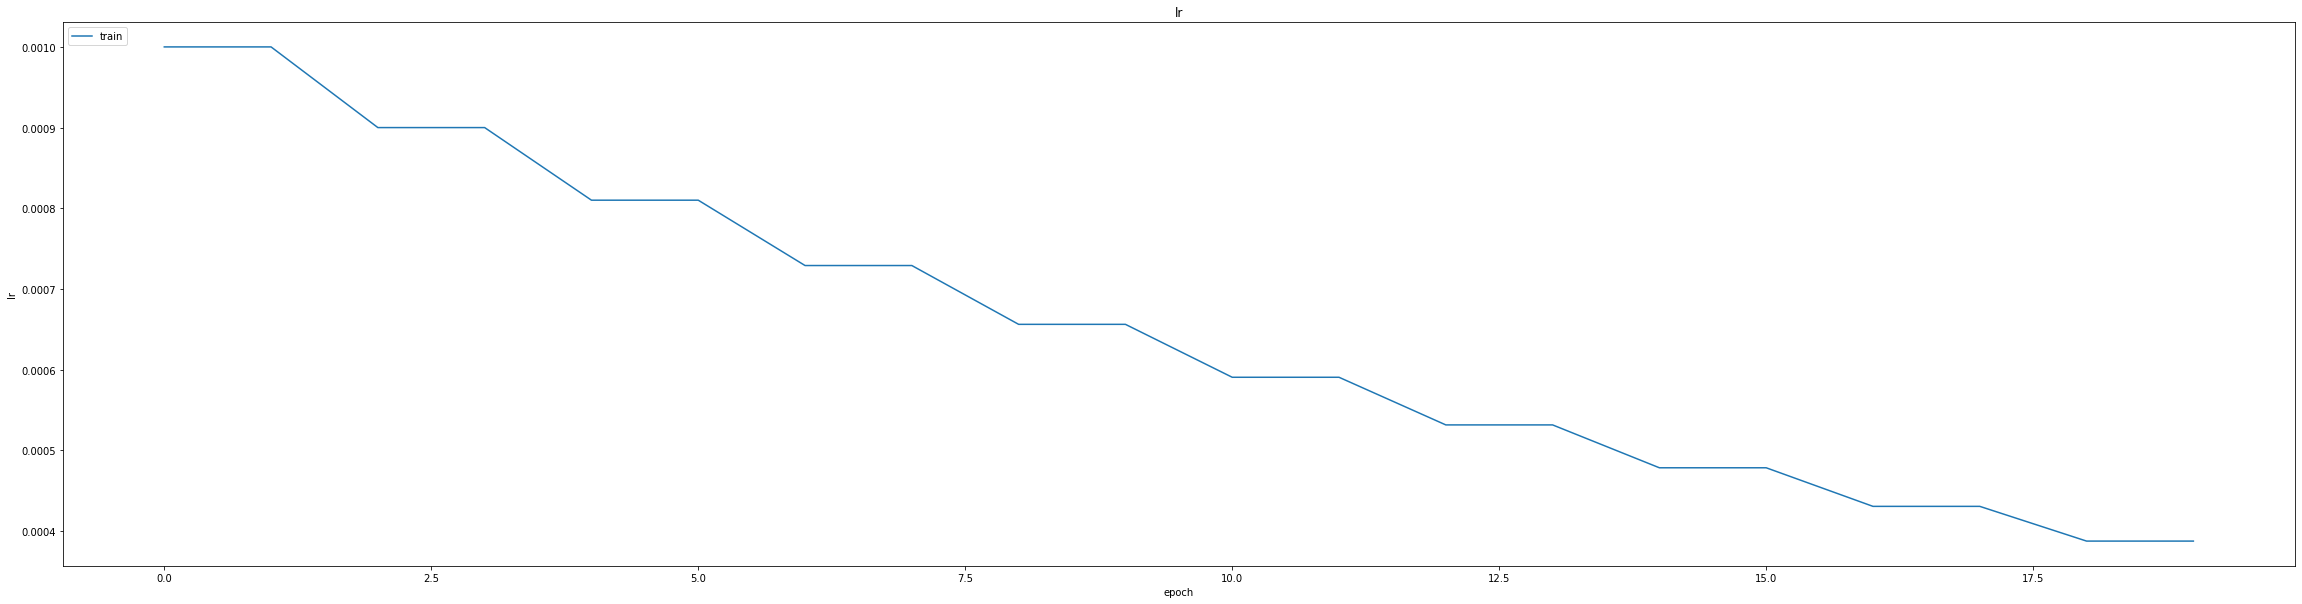

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.027040015906095505
0.032910071313381195
234/234 [==============================] - 2s 4ms/step
0.9835776075268179


234/234 [==============================] - 1s 4ms/step


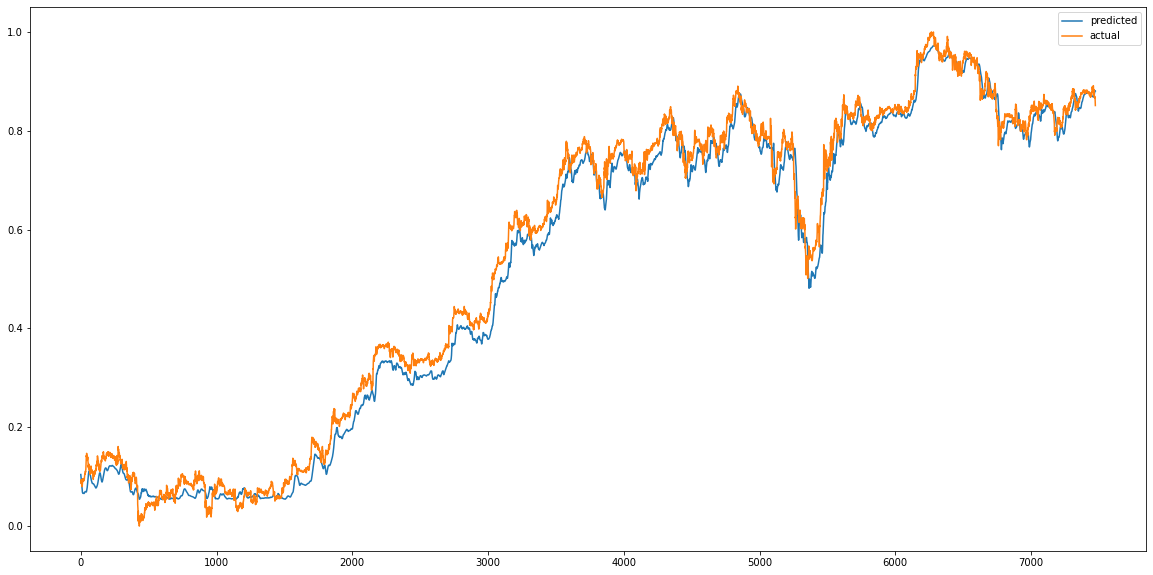

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD5_LSTM")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


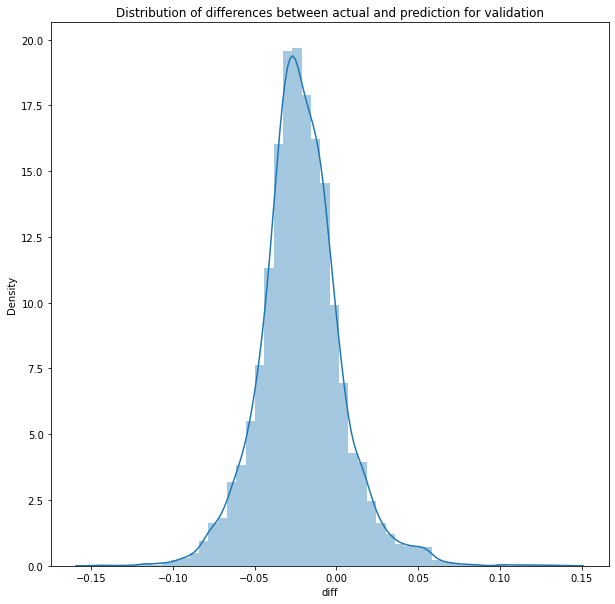

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1157/1157 [==============================] - 5s 4ms/step


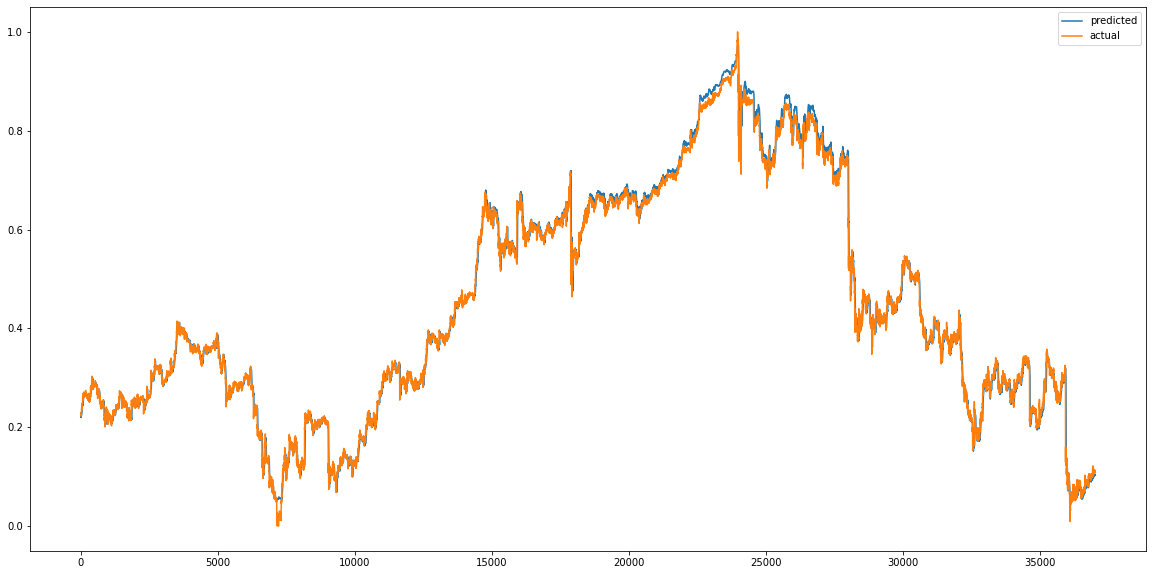

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


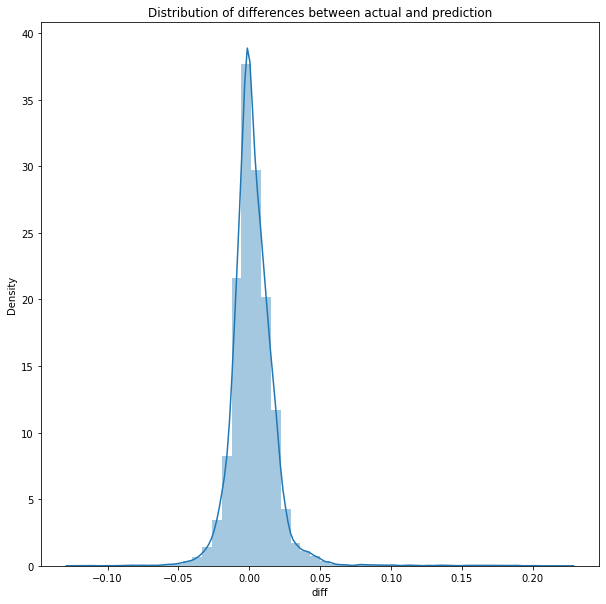

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.00026189520981109455
MAE :  0.010478465477442802
RMSE  : 0.016183176752760705
1157/1157 [==============================] - 5s 4ms/step
R2_Score  : 0.9950809106012001


count    37023.000000
mean         0.002473
std          0.015993
min         -0.123305
25%         -0.005583
50%          0.001046
75%          0.009683
max          0.222957
Name: diff, dtype: float64